In [1]:
import numpy as np

from keras.layers import Input, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D, Flatten

from keras.models import Model

from keras.layers.merge import concatenate
from keras.utils import to_categorical
from keras.utils import plot_model

from keras.datasets import mnist

import matplotlib.pyplot as plt

C:\Users\aleksander.molak\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Build a CNN Y-net with two independent inputs 
 using Keras functional API

* ## Read & convert the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

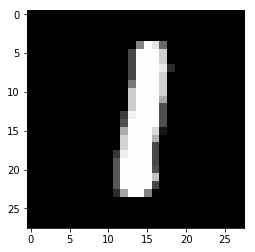

In [4]:
# Show a randomly selected pic from the dataset
plt.imshow(X_train[np.random.randint(60000)], cmap = 'gray')
plt.show()

In [5]:
# No. of labels
n_labels = len(np.unique(y_train))

In [6]:
n_labels

10

In [7]:
# Image size
img_size = X_train.shape[1]

In [8]:
# Convert labels to categoroical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
# Reshape and noemalize input imgs
X_train = X_train.reshape([-1, img_size, img_size, 1])
X_test = X_test.reshape([-1, img_size, img_size, 1])

In [10]:
# Normalize 
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

* ## Define net params

In [11]:
input_shape = (img_size, img_size, 1)
batch_size = 32
kernel_size = 3
dropout = .4
n_filters = 32

* ## Build the model

In [12]:
# Left branch
inputs_left = Input(shape = input_shape)
x1 = inputs_left
filters = n_filters

# Build 3 layers of Conv2D-Dropout-Pooling
for i in range(3):
    x1 = Conv2D(filters = filters, 
                kernel_size = kernel_size,
                padding = 'same', 
                activation = 'relu')(x1)
    x1 = Dropout(dropout)(x1)
    x1 = MaxPooling2D()(x1)
    filters *= 2

In [30]:
# Right branch
inputs_right = Input(shape = input_shape)
x2 = inputs_right
filters = n_filters

# Build 3 layers of Conv2D-Dropout-Pooling
for i in range(3):
    x2 = Conv2D(filters = filters, 
                kernel_size = kernel_size,
                padding = 'same', 
                activation = 'relu',
                dilation_rate = 2)(x2)
    x2 = Dropout(dropout)(x2)
    x2 = MaxPooling2D()(x2)
    filters *= 2

In [31]:
# Merge inputs
y = concatenate([x1, x2])

# Flatten & dropout
y = Flatten()(y)
y = Dropout(dropout)(y)

output = Dense(n_labels, activation = 'softmax')(y)

In [32]:
# Build the model
model = Model([inputs_left, inputs_right], output)

In [33]:
plot_model(model, to_file = 'model_01.png')

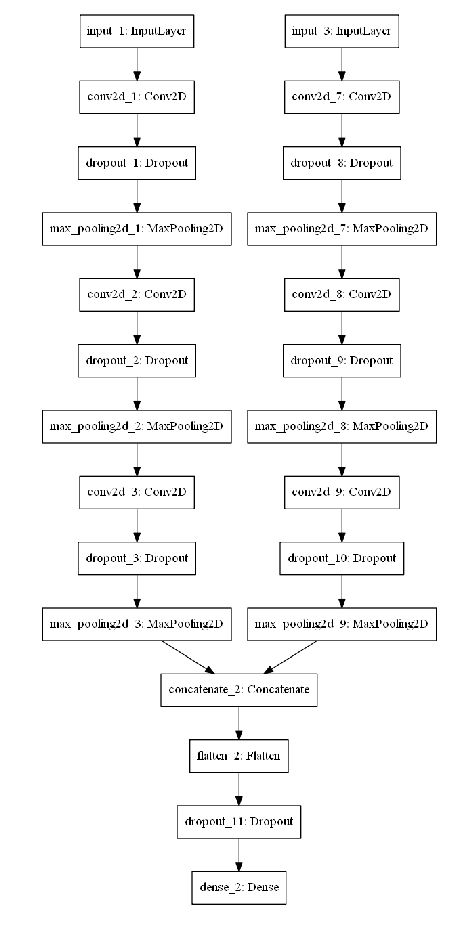

In [34]:
png = plt.imread('model_01.png')
plt.figure(figsize = (33, 16.5))
plt.imshow(png)
plt.axis('off')
plt.show()

* ## Compile the model

In [40]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam', 
              metrics = ['accuracy'])

* ## Fit the model

In [43]:
model.fit([X_train, X_train], y_train,
          validation_data = ([X_test, X_test], y_test),
          epochs = 3, 
          batch_size = batch_size)